<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Objective" data-toc-modified-id="Project-Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Objective</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li></ul></div>

# Table of Contents



# Introduction

## Project Objective

## Dataset Description

The dataset used for this analysis is sourced from Kaggle, specifically the [Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/datasets/dataturks/dataset-for-detection-of-cybertrolls).

This dataset consists of tweets that have been manually classified as either aggressive (potentially from trolls) or not aggressive. 

Key features of the dataset:
- Contains 20,001 items (tweets).
- Each tweet has been manually labeled.
- The labels are categorized into two groups:
    - 1 represents Cyber-Aggressive (potentially from trolls).
    - 0 represents Non Cyber-Aggressive.

This dataset serves as a valuable resource for training a machine learning model to identify troll behavior on social media platforms, thereby aiding in online safety and content moderation efforts.

## Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter

In [2]:
# nltk.download('stopwords')

# Data Loading and Initial Inspection

In [3]:
df = pd.read_json('../Data/Dataset for Detection of Cyber-Trolls.json', lines= True)

In [4]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [5]:
df.shape

(20001, 3)

In [6]:
df.isnull().sum()

content           0
annotation        0
extras        20001
dtype: int64

`extras` column is entirely null, so we will be dropping it.

In [7]:
df = df.drop(['extras'], axis=1)

After dropping the 'extras' column, we now have a dataset with two useful features: 'content' and 'annotation'. The 'content' column contains the text of the social media posts, while the 'annotation' column carries a dictionary object with 'notes' and 'label' keys. 

However, for ease of analysis, it is more convenient to have 'troll' (which indicates whether a post is made by a troll or not) as a separate column rather than embedded within 'annotation'. Hence, we extract 'label' from the 'annotation' column and add it as a new column to the dataframe.

In [8]:
# Create Binary column 'Troll'
df['Troll'] = df['annotation'].apply(lambda x: x['label'][0])

# Convert Troll column to integers
df['Troll'] = df['Troll'].astype(int)

# Remove old column 'annotation' as it is entirely redundant now.
df = df.drop(['annotation'], axis=1)

Once this is done, we then count the number of each label to see the distribution of troll and non-troll posts in our dataset. The countplot visualization gives a clear picture of this distribution. The '0' label represents non-troll posts and '1' represents troll posts.

In [9]:
df['Troll'].value_counts()

0    12179
1     7822
Name: Troll, dtype: int64

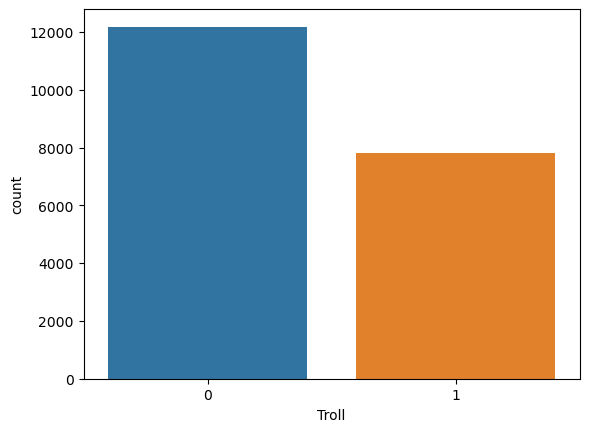

In [10]:
sns.countplot(x='Troll', data=df)
plt.show()

In [11]:
df

,content,Troll
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


# Feature Extraction

In [12]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove punctuation and filter out stop words
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return words

# Apply the preprocessing to the 'content' column
df['cleaned_words'] = df['content'].apply(preprocess_text)

In [13]:
df

,content,Troll,cleaned_words
0,Get fucking real dude.,1,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,"[wtf, talking, men, men, thats, menage, gay]"
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,"[dont, complaining, going]"
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,"[bahah, yeah, totally, gon, na, get, pissed, t..."
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,"[hahahahaha, im, evil, mwahahahahahahahahaha]"
19999,What&;s something unique about Ohio? :),0,"[something, unique, ohio]"


In [14]:
# Concatenate all the lists of words
all_words = [word for words in df['cleaned_words'] for word in words]

# Count the frequency of each word
word_freq = Counter(all_words)

# Print the most common words and their frequencies
for word, freq in word_freq.most_common(10):
    print(f'{word}: {freq}')

hate: 2791
damn: 2466
ass: 1737
sucks: 1525
fuck: 1459
like: 1434
lol: 1432
get: 1045
would: 1007
fucking: 991


In [15]:
df

,content,Troll,cleaned_words
0,Get fucking real dude.,1,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,"[wtf, talking, men, men, thats, menage, gay]"
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,"[dont, complaining, going]"
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,"[bahah, yeah, totally, gon, na, get, pissed, t..."
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,"[hahahahaha, im, evil, mwahahahahahahahahaha]"
19999,What&;s something unique about Ohio? :),0,"[something, unique, ohio]"


In [16]:
# Concatenate all the lists of words in the "cleaned_words" column
all_words = [word for words_list in df['cleaned_words'] for word in words_list]

# Print the first 10 words to check if it's working correctly
print(all_words[:10])

['get', 'fucking', 'real', 'dude', 'dirty', 'come', 'crook', 'rengel', 'dems', 'fucking']


In [17]:
# Filter the DataFrame for troll messages
troll_df = df[df['Troll'] == 1]

# Concatenate all the lists of words in the "cleaned_words" column of troll_df
troll_words = [word for words_list in troll_df['cleaned_words'] for word in words_list]

# Print the first 10 words to check if it's working correctly
print(troll_words[:10])

['get', 'fucking', 'real', 'dude', 'dirty', 'come', 'crook', 'rengel', 'dems', 'fucking']


In [18]:
# Count the frequency of each word
troll_word_freq = Counter(troll_words)

# Print the most common words and their frequencies
for word, freq in troll_word_freq.most_common(10):
    print(f'{word}: {freq}')

hate: 1308
damn: 1098
fuck: 1039
ass: 1028
sucks: 718
fucking: 631
lol: 593
bitch: 500
like: 497
u: 487


In [19]:
troll_df

,content,Troll,cleaned_words
0,Get fucking real dude.,1,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,"[wtf, talking, men, men, thats, menage, gay]"
...,...,...,...
7817,/nerd *laugh*,1,[laugh]
7818,Ah. Gay!,1,"[ah, gay]"
7819,I hate you so much I just want to smash your f...,1,"[hate, much, want, smash, face]"
7820,Yes you are a loser... I could have told you t...,1,"[yes, loser, could, told, long, time, ago]"
